In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('full_data.csv')

In [3]:
df.shape

(4981, 11)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
pd.value_counts(df['gender'])

Female    2907
Male      2074
Name: gender, dtype: int64

In [6]:
pd.value_counts(df['ever_married'])

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [7]:
pd.value_counts(df['work_type'])

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [8]:
pd.value_counts(df['Residence_type'])

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [9]:
pd.value_counts(df['smoking_status'])

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [10]:
label = LabelEncoder()
df['gender'] = label.fit_transform(df['gender'])

In [11]:
df['Residence_type'] = label.fit_transform(df['Residence_type'])
df['ever_married'] = label.fit_transform(df['ever_married'])

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


In [13]:
df['work_type'] = label.fit_transform(df['work_type'])
df['smoking_status'] = label.fit_transform(df['smoking_status'])

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [15]:
oneHot = OneHotEncoder()
work_type = oneHot.fit_transform(df['work_type'].values.reshape(-1,1)).toarray()

In [16]:
oneHot = OneHotEncoder()
smoking_status = oneHot.fit_transform(df['smoking_status'].values.reshape(-1,1)).toarray()

In [17]:
work_type

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [18]:
smoking_status

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [19]:
df.drop(columns=['work_type', 'smoking_status'], inplace=True)

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,0,105.92,32.5,1
2,0,49.0,0,0,1,1,171.23,34.4,1
3,0,79.0,1,0,1,0,174.12,24.0,1
4,1,81.0,0,0,1,1,186.21,29.0,1


In [21]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [22]:
X[0]

array([  1.  ,  67.  ,   0.  ,   1.  ,   1.  ,   1.  , 228.69,  36.6 ])

In [23]:
X = np.c_[X, work_type, smoking_status]

In [24]:
X[0]

array([  1.  ,  67.  ,   0.  ,   1.  ,   1.  ,   1.  , 228.69,  36.6 ,
         0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ])

In [25]:
y[0]

1

In [26]:
# Feature Scaling - Standardization
st = StandardScaler()
X = st.fit_transform(X)

In [27]:
X[0]

array([ 1.1839085 ,  1.04058433, -0.32618577,  4.13675323,  0.72013718,
        0.98347323,  2.7234109 ,  1.19323816, -0.38534366,  0.86116688,
       -0.43872844, -0.395248  , -0.65643786,  2.17832459, -0.76471668,
       -0.42958377])

In [28]:
# 75% - training, 25% - testing
# divides the data into training and testing + shuffles the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression()

In [30]:
y_pred = logistic.predict(x_test)

In [31]:
accuracy_score(y_pred, y_test)

0.9478330658105939

In [32]:
confusion_matrix(y_test, y_pred)

array([[1181,    0],
       [  65,    0]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1181
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1246
   macro avg       0.47      0.50      0.49      1246
weighted avg       0.90      0.95      0.92      1246



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
cm = confusion_matrix(y_test, y_pred, normalize="true")

In [44]:
cm

array([[1., 0.],
       [1., 0.]])

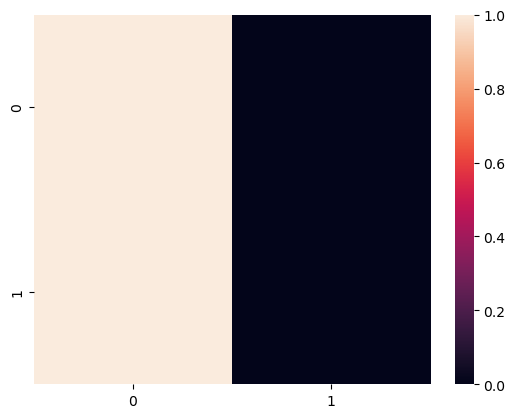

In [45]:
sns.heatmap(cm)
plt.show()